# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

path = "C:\\Users\\kganesh\\Documents\\GitHub\\CarND-Traffic-Sign-Classifier-Project\\"

# TODO: Fill this in based on where you saved the training and testing data

training_file = path + 'train.p'
validation_file= path + 'valid.p'
testing_file = path + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples.
n_valid = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[1])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

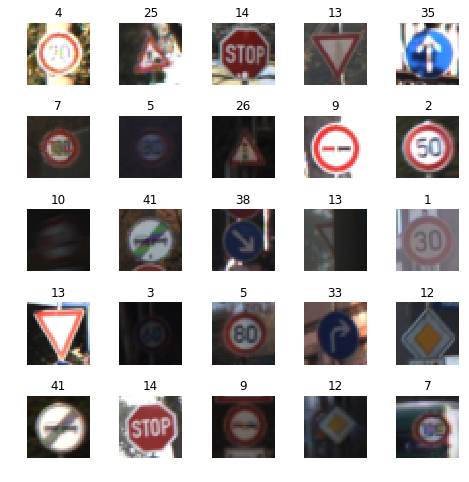

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(8,8)

num_rows = 5
num_cols = 5

gs = gridspec.GridSpec(num_rows, num_cols, hspace=0.5)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]

randomlist = []
num_low = 0
num_high = len(y_train)
for x in range (0, num_rows * num_cols):
    randomlist.append(np.random.randint(num_low, num_high))

for i in range(0, num_rows * num_cols):
    ax[i].imshow(X_train[randomlist[i]])
    ax[i].set_title(y_train[randomlist[i]])
    ax[i].axis('off')
plt.show()

    ClassId                                           SignName  Freq
0         0                               Speed limit (20km/h)   180
1         1                               Speed limit (30km/h)  1980
2         2                               Speed limit (50km/h)  2010
3         3                               Speed limit (60km/h)  1260
4         4                               Speed limit (70km/h)  1770
5         5                               Speed limit (80km/h)  1650
6         6                        End of speed limit (80km/h)   360
7         7                              Speed limit (100km/h)  1290
8         8                              Speed limit (120km/h)  1260
9         9                                         No passing  1320
10       10       No passing for vehicles over 3.5 metric tons  1800
11       11              Right-of-way at the next intersection  1170
12       12                                      Priority road  1890
13       13                       

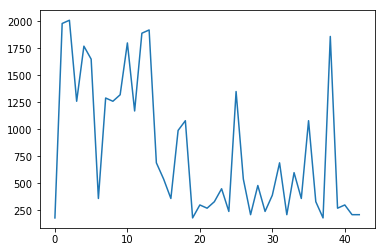

In [7]:
from scipy.stats import itemfreq
import pandas as pd

data = pd.read_csv('C:\\Users\\kganesh\\Documents\\GitHub\\CarND-Traffic-Sign-Classifier-Project\\signnames.csv')
f = itemfreq(y_train)
data['Freq'] = f[:,1]

plt.plot(data['Freq'])
print(data)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Before


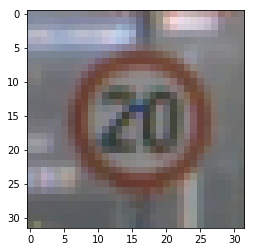

After


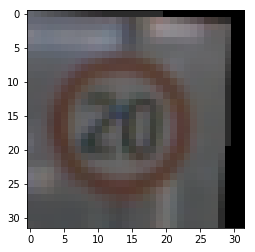

In [4]:
import skimage.transform as transform
import skimage.exposure as exposure

def randomize_image(img):
    
    angle = np.random.randint(-3,3)
    tf_rotate = transform.SimilarityTransform(rotation=np.deg2rad(angle))
    
    shift_y = np.random.randint(-4,4)
    shift_x = np.random.randint(-4,4)
    tf_shift = transform.SimilarityTransform(translation=[shift_x, shift_y])
    
    exp = np.random.randint(50,100)/100.0
    log = np.random.randint(50,100)/100.0

    img = exposure.adjust_gamma(img, exp)
    img = exposure.adjust_log(img, log)
    img = transform.warp(img, (tf_rotate+tf_shift))

    return img

img = X_train[10000]

print('Before')
plt.imshow(img)
plt.show()

img = randomize_image(img)

print('After')
plt.imshow(img)
plt.show()

In [5]:
import pandas as pd

# put the y_test values in the Type column
pdytrain = pd.DataFrame(y_train)
pdytrain.columns = ['Type']

# save indices in the Index column
for index in pdytrain.index:
    pdytrain.loc[index,'Index'] = index

# set Index column to integer type
pdytrain.Index = pdytrain.Index.astype(int)

In [9]:
# add more images for labels with with less than MINLIMIT instances

def add_images():
    
    MINLIMIT = 500 # each category should have at least MINLIMIT images
    global X_train, y_train
    
    for index in data.index:

        print("Label", index)    
        freq = data.loc[index,'Freq']

        if (freq < MINLIMIT):
        
            neededpics = MINLIMIT - freq

            pics = pdytrain[pdytrain['Type'] == index]
            indices = pics['Index'].values
        
            for i in indices:
            
                img = X_train[i]
                label = y_train[i]
            
                img = randomize_image(img)
            
                X_train = np.concatenate((X_train, [img]), axis=0)
                y_train = np.concatenate((y_train, [label]), axis=0)

# Note: This function takes a long time so its commented out for iterative debug
add_images()

Label 0
Label 1
Label 2
Label 3
Label 4
Label 5
Label 6
Label 7
Label 8
Label 9
Label 10
Label 11
Label 12
Label 13
Label 14
Label 15
Label 16
Label 17
Label 18
Label 19
Label 20
Label 21
Label 22
Label 23
Label 24
Label 25
Label 26
Label 27
Label 28
Label 29
Label 30
Label 31
Label 32
Label 33
Label 34
Label 35
Label 36
Label 37
Label 38
Label 39
Label 40
Label 41
Label 42


    ClassId                                           SignName  Freq  Freq2
0         0                               Speed limit (20km/h)   180    180
1         1                               Speed limit (30km/h)  1980   1980
2         2                               Speed limit (50km/h)  2010   2010
3         3                               Speed limit (60km/h)  1260   1260
4         4                               Speed limit (70km/h)  1770   1770
5         5                               Speed limit (80km/h)  1650   1650
6         6                        End of speed limit (80km/h)   360    360
7         7                              Speed limit (100km/h)  1290   1290
8         8                              Speed limit (120km/h)  1260   1260
9         9                                         No passing  1320   1320
10       10       No passing for vehicles over 3.5 metric tons  1800   1800
11       11              Right-of-way at the next intersection  1170   1170
12       12 

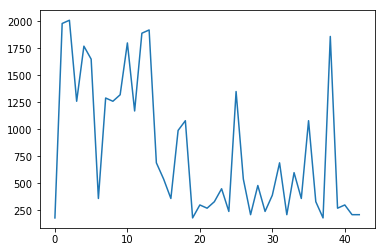

In [8]:
f = itemfreq(y_train)
data['Freq2'] = f[:,1]

plt.plot(data['Freq2'])
print(data)

In [9]:
#X_train.dump("X_train_enh")
#y_train.dump("y_train_enh")

X_train = np.load("X_train_enh")
y_train = np.load("y_train_enh")

print(X_train.shape)
print(y_train.shape)

(40859, 32, 32, 3)
(40859,)


In [10]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

def convert_to_gray(images):
    
    len = images.shape[0]
    gray_images = np.ndarray([images.shape[0], images.shape[1], images.shape[2],1])

    for i in range (0, len):
        
        img_in = images[i]
        img_r = img_in[:,:,0]
        img_g = img_in[:,:,1]
        img_b = img_in[:,:,2]

        # simple average formula to generate grayscale
        # img_out = 0.333*img_r + 0.333*img_g + 0.333*img_b

        # weighted average formula to generate grayscale
        img_out = 0.299*img_r + 0.587*img_g + 0.114*img_b
        
        gray_images[i,:,:,0] = img_out

    return gray_images
    
X_train = convert_to_gray(X_train) 
X_valid = convert_to_gray(X_valid) 
X_test = convert_to_gray(X_test)

print('Converted to Grayscale')

Converted to Grayscale


In [11]:
def normalize (images):
    len = images.shape[0]
    for i in range (0, len):    
        images[i] = (images[i] - 127.5)/127.5
    return images

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

print('Normalized images')

Normalized images


In [12]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(40859, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


### Model Architecture

In [13]:
import tensorflow as tf

EPOCHS = 400
BATCH_SIZE = 200

In [14]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    # Hyperparameters for truncated mean function
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    # The Final output from the CNN
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [15]:
tf.reset_default_graph() 

# 2 independent variables that need to be passed
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))

# 1 dependent variable
one_hot_y = tf.one_hot(y, 43)

In [16]:
rate = 0.0009

# output values
logits = LeNet(x)

# prediction
prediction = tf.nn.softmax(logits)
prediction_label = tf.argmax(prediction, dimension=1)

# cost function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

# loss function
loss_operation = tf.reduce_mean(cross_entropy)

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# determine if predictions are correct
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# calculate accuracy
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [17]:
def evaluate(X_data, y_data):
    
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    
    for offset in range(0, num_examples, BATCH_SIZE):
        
        batch_x = X_data[offset : offset+BATCH_SIZE]
        batch_y = y_data[offset : offset+BATCH_SIZE]
        
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        
    return total_accuracy / num_examples

saver = tf.train.Saver()

In [20]:
from sklearn.utils import shuffle

with tf.Session() as sess:

    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")

    for i in range(EPOCHS):

        print("EPOCH {}".format(i+1))
        X_train, y_train = shuffle(X_train, y_train)
        
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

    saver.save(sess, path+'lenet')
    print("Model saved")

Training...
EPOCH 1
Validation Accuracy = 0.666

EPOCH 2
Validation Accuracy = 0.799

EPOCH 3
Validation Accuracy = 0.847

EPOCH 4
Validation Accuracy = 0.867

EPOCH 5
Validation Accuracy = 0.879

EPOCH 6
Validation Accuracy = 0.898

EPOCH 7
Validation Accuracy = 0.897

EPOCH 8
Validation Accuracy = 0.890

EPOCH 9
Validation Accuracy = 0.896

EPOCH 10
Validation Accuracy = 0.880

EPOCH 11
Validation Accuracy = 0.907

EPOCH 12
Validation Accuracy = 0.918

EPOCH 13
Validation Accuracy = 0.897

EPOCH 14
Validation Accuracy = 0.909

EPOCH 15
Validation Accuracy = 0.903

EPOCH 16
Validation Accuracy = 0.908

EPOCH 17
Validation Accuracy = 0.898

EPOCH 18
Validation Accuracy = 0.912

EPOCH 19
Validation Accuracy = 0.916

EPOCH 20
Validation Accuracy = 0.914

EPOCH 21
Validation Accuracy = 0.902

EPOCH 22
Validation Accuracy = 0.901

EPOCH 23
Validation Accuracy = 0.911

EPOCH 24
Validation Accuracy = 0.897

EPOCH 25
Validation Accuracy = 0.917

EPOCH 26
Validation Accuracy = 0.911

EPOCH 27


### Test the Model on the Test Set!

In [18]:
# Evaluate model on the Test Dataset!! 

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())

    testloader = tf.train.import_meta_graph('./lenet.meta')
    testloader.restore(sess, "./lenet")

    test_accuracy = evaluate(X_test, y_test)
    
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.923


### Visual inspection of predictions some sample cases from the test set

In [19]:
X_tmp = test['features']
y_tmp = test['labels']

indices = [2, 20, 201, 500, 2000]

test_set_images = X_tmp[indices]
test_set_labels = y_tmp[indices]

In [20]:
orig = test_set_images

x_in = orig
x_in = convert_to_gray(x_in)
x_in = normalize(x_in)

y_in = test_set_labels

print(orig.shape)
print(x_in.shape)
print(y_in.shape)

(5, 32, 32, 3)
(5, 32, 32, 1)
(5,)


5


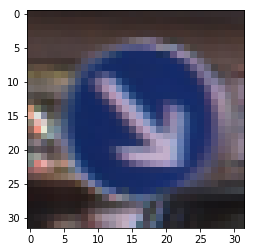

Predictions Keep right
Correct: Keep right


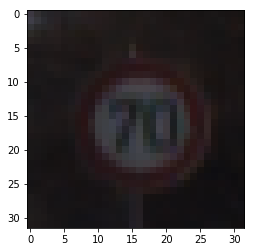

Predictions Speed limit (70km/h)
Correct: Speed limit (70km/h)


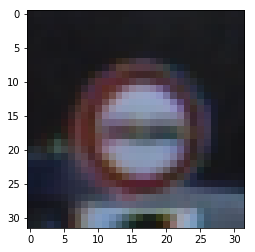

Predictions No passing
Correct: No passing


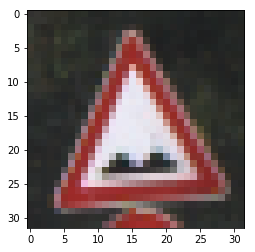

Predictions Bumpy road
Correct: Bumpy road


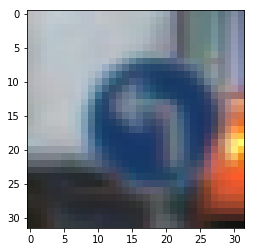

Predictions Turn left ahead
Correct: Turn left ahead
Predictions Done


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from scipy import ndimage

files = ["im1.jpg", "im2.jpg", "im3.jpg", "im4.jpg", "im5.jpg", "im6.jpg", "im7.jpg"]
mylabels = [8, 2, 14, 33, 0, 0, 0]

myimages = []

for f in files:
    img = ndimage.imread(path+f)
    myimages.append(img)
    
myimages = np.asarray(myimages)
mylabels = np.asarray(mylabels)

### Predict the Sign Type for Each Image

In [37]:
orig = myimages

x_in = orig
x_in = convert_to_gray(x_in)
x_in = normalize(x_in)

y_in = mylabels

print(orig.shape)
print(x_in.shape)
print(y_in.shape)

(7, 32, 32, 3)
(7, 32, 32, 1)
(7,)


7


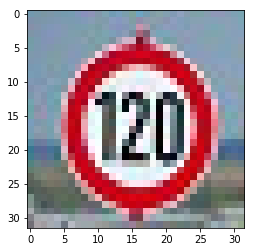

Prediction: Speed limit (120km/h)


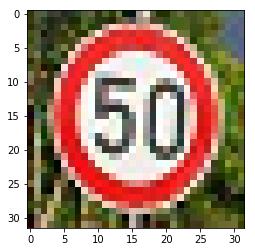

Prediction: Speed limit (50km/h)


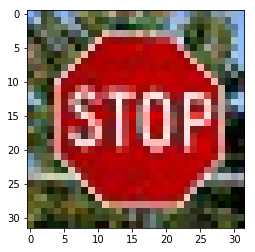

Prediction: Stop


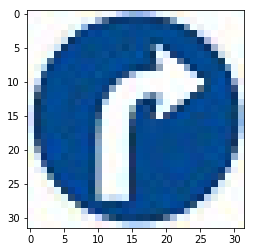

Prediction: Turn right ahead


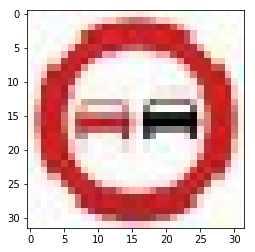

Prediction: No passing


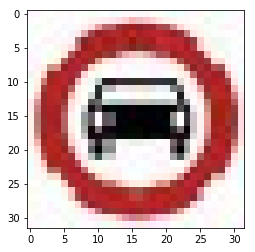

Prediction: No passing for vehicles over 3.5 metric tons


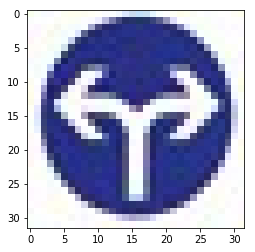

Prediction: Speed limit (70km/h)
Predictions Done


In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())

    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    
    mysoftmax = sess.run(prediction, feed_dict={x: x_in})
    mypredictions = sess.run(prediction_label, feed_dict={x: x_in})
    myaccuracy = evaluate(x_in, y_in)
    
    num_images = orig.shape[0]
    print(num_images)
    
    for i in range(0, num_images):
        plt.imshow(orig[i])
        plt.show()
        print("Prediction:", data.ix[mypredictions[i], "SignName"])
        
print("Predictions Done")

### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print("Test Set Accuracy = {:.3f}".format(myaccuracy))


Test Set Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: myimages})
    my_top_k = sess.run(top_k, feed_dict={x: myimages})

print(my_top_k)

TopKV2(values=array([[ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.98050964,  0.01949037,  0.        ],
       [ 1.        ,  0.        ,  0.        ]], dtype=float32), indices=array([[ 8,  0,  1],
       [ 0,  1,  2],
       [31,  0,  1],
       [11, 28,  0],
       [11,  0,  1]]))


> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 